In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_13028\1808188670.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
pl = nltk.corpus.gutenberg.words('milton-paradise.txt')
print(pl)

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]


In [4]:
# text_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')
# print(text_sentences)

In [5]:
# for sentence in text_sentences:
#     new_filtered_list = [word for word in sentence if not word.isalnum()]
# new_filtered_list
new_filtered_list = [words.lower() for words in pl]


In [6]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
plstopwords = ['thus','yet','may','thou','u','thy','thee']
stopwords.extend(plstopwords)
stopwords = set(stopwords)

new_filtered_list = [word for word in new_filtered_list if word.isalpha() and word not in stopwords]

In [8]:
new_filtered_list = [ word for word in new_filtered_list if word.isalnum() not in stopwords]

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
finalfilterwords = [lemmatizer.lemmatize(word) for word in new_filtered_list]
#I chose lemmatization is more complex and most of time more accurate than stemming. 

In [10]:
from nltk.probability import FreqDist
wordfq = nltk.FreqDist(finalfilterwords)
mostcom = wordfq.most_common(20)
mostcom

[('heaven', 436),
 ('god', 316),
 ('shall', 283),
 ('earth', 217),
 ('though', 217),
 ('u', 187),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('power', 125),
 ('great', 123),
 ('till', 120),
 ('like', 120),
 ('world', 119),
 ('hell', 119)]

In [15]:
df = pd.DataFrame(list(mostcom))
df

,0,1
0,heaven,436
1,god,316
2,shall,283
3,earth,217
4,though,217
5,u,187
6,man,176
7,first,175
8,day,157
9,high,153


Text(38.347222222222214, 0.5, 'Count')

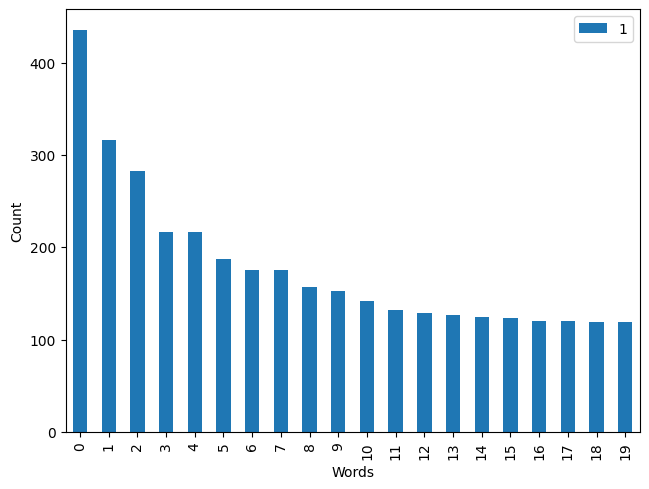

In [31]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
df.plot(kind='bar', ax=ax)
plt.tight_layout()
ax.set_xlabel('Words') 
ax.set_ylabel('Count') 

In [ ]:
#This is the bar chart of the 20 most common words that hold sentimnet value. The numbers on the x axis corresponding to the df table above. 

In [39]:
sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')[:15]
print(sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song',

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [45]:
sid = SentimentIntensityAnalyzer()

for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(' '.join(sentence))
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']']
compound: 0.4404, neg: 0.219, neu: 0.381, pos: 0.4, 
['Book', 'I']
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'orac

In [56]:
from nltk.tokenize import sent_tokenize
paradise_2 = nltk.corpus.gutenberg.raw('milton-paradise.txt')
tokened_Sample = sent_tokenize(paradise_2) 
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for index, sentence in enumerate(tokened_Sample):
    scores = analyzer.polarity_scores(sentence)
    scores['index'] = index
    sentiments.append(scores)

positive_sentences = sorted(sentiments, key=lambda x: x['pos'], reverse=True)[:5]
negative_sentences = sorted(sentiments, key=lambda x: x['neg'], reverse=True)[:5]
neutral_sentences = sorted(sentiments, key=lambda x: (x['neu'], -x['compound']))[:5]
positive_sentence_indices = [sent['index'] for sent in positive_sentences]
negative_sentence_indices = [sent['index'] for sent in negative_sentences]
neutral_sentence_indices = [sent['index'] for sent in neutral_sentences]
   
print("Positive:", positive_sentence_indices)
print("\nNegative:", negative_sentence_indices)
print("\nNeutral:", neutral_sentence_indices)

Positive: [599, 820, 900, 1428, 1221]

Negative: [150, 506, 1674, 473, 172]

Neutral: [820, 1428, 599, 900, 1674]


In [60]:
def get_sentence(index):
    if 0 <= index < len(tokened_Sample):
        sentence = tokened_Sample[index]
        scores = analyzer.polarity_scores(sentence)
        return scores, print(sentence)
   

In [71]:
get_sentence(820)


O Heaven!


({'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5562}, None)

The sentences the code returned were only really considered to be perfectly postive or negatice if they were very few words and almost all the words had a super postive or negative connotation prescribed with them. For example, a lot of the setences are 2 words one being O and the other being a word like heavens or terrible. There are a few sentences with 5-8 words and it is fairly negative/postive. If there was a way to set a minimum sentence length requirment I believe the results would be more accurate and have more substance to them. Or even looking a sentences that are rated a .8 instead of a 1.0.